In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

In [4]:
#Loading Dataset
vino = pd.read_csv("winequality-red.csv")

# Part I : Data Preparation

In [5]:
vino.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
vino.shape

(1599, 12)

In [7]:
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
vino.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#Finding duplicates
bool_series= vino.duplicated()
bool_series

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [10]:
vino1=vino

In [11]:
#After reviewing the dataset, it was concluded that the duplicates could represent a different wine with
#the same characteristics. Because of this and since the models presented a better output with the duplicates in, duplicates were not be removed for this project.


#vino1 = vino.drop_duplicates(keep="first")

In [12]:
#vino1.shape

In [13]:
vino1.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [14]:
## Identifying Categorical vs Continuous values
uniquecol=[]
for col in vino1.columns:
    nuni=vino1[col].nunique()
    uniquecol.append(nuni)
unidf=pd.DataFrame(uniquecol,columns=['Unique Values'],index=vino1.columns) 
unidf

,Unique Values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [15]:
vino1.value_counts(['quality'])

quality
5          681
6          638
7          199
4           53
8           18
3           10
dtype: int64

In [16]:
#Converting dpendent variable into binary output variable
vino1['quality2'] = [ 1 if x>=6 else 0 for x in vino1.quality] 

In [17]:
vino1.value_counts(['quality2'])

quality2
1           855
0           744
dtype: int64

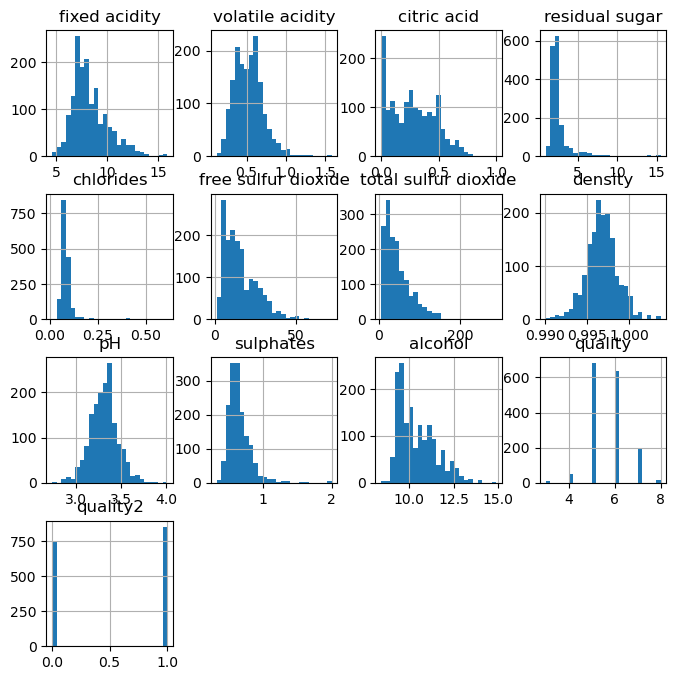

In [18]:
vino1.hist(bins=25,figsize=(8,8))
plt.show()

<Axes: xlabel='quality2', ylabel='Density'>

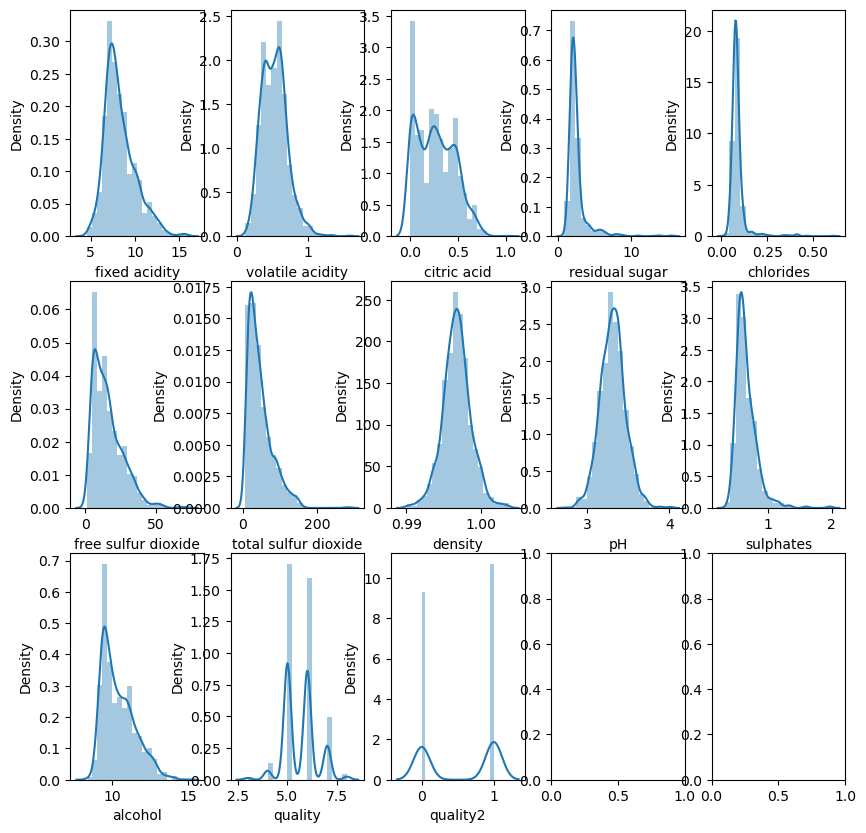

In [19]:
## Distributions per variables
fig, ax = plt.subplots(3,5, figsize=(10,10))
sns.distplot(vino1['fixed acidity'], bins = 20, ax=ax[0,0]) 
sns.distplot(vino1['volatile acidity'], bins = 20, ax=ax[0,1]) 
sns.distplot(vino1['citric acid'], bins = 20, ax=ax[0,2]) 
sns.distplot(vino1['residual sugar'], bins = 20, ax=ax[0,3]) 
sns.distplot(vino1['chlorides'], bins = 20, ax=ax[0,4])
sns.distplot(vino1['free sulfur dioxide'], bins = 20, ax=ax[1,0])
sns.distplot(vino1['total sulfur dioxide'], bins = 20, ax=ax[1,1]) 
sns.distplot(vino1['density'], bins = 20, ax=ax[1,2]) 
sns.distplot(vino1['pH'], bins = 20, ax=ax[1,3]) 
sns.distplot(vino1['sulphates'], bins = 20, ax=ax[1,4]) 
sns.distplot(vino1['alcohol'], bins = 20, ax=ax[2,0]) 
sns.distplot(vino1['quality'], bins = 20, ax=ax[2,1]) 
sns.distplot(vino1['quality2'], bins = 20, ax=ax[2,2]) 

[Text(0.5, 1.0, 'quality2')]

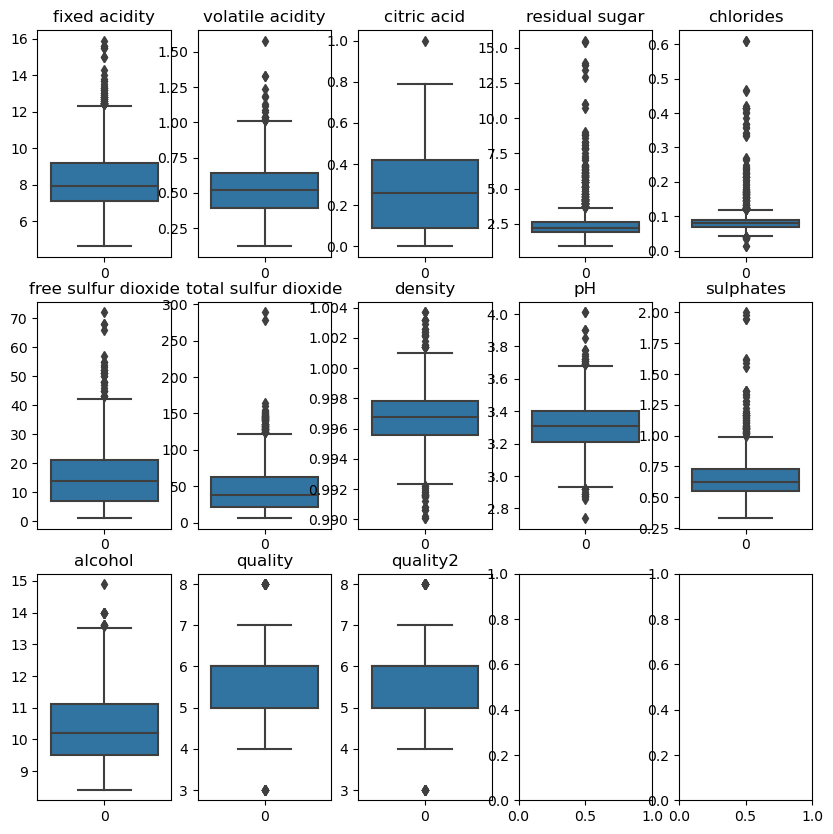

In [20]:
## Outliers visualization
fig, ax = plt.subplots(3,5, figsize=(10,10))
sns.boxplot(vino1['fixed acidity'],ax=ax[0,0]).set(title='fixed acidity') 
sns.boxplot(vino1['volatile acidity'],ax=ax[0,1]).set(title='volatile acidity')  
sns.boxplot(vino1['citric acid'],ax=ax[0,2]).set(title='citric acid') 
sns.boxplot(vino1['residual sugar'],ax=ax[0,3]).set(title='residual sugar') 
sns.boxplot(vino1['chlorides'],ax=ax[0,4]).set(title='chlorides') 
sns.boxplot(vino1['free sulfur dioxide'],ax=ax[1,0]).set(title='free sulfur dioxide') 
sns.boxplot(vino1['total sulfur dioxide'],ax=ax[1,1]).set(title='total sulfur dioxide')  
sns.boxplot(vino1['density'],ax=ax[1,2]).set(title='density')  
sns.boxplot(vino1['pH'],ax=ax[1,3]).set(title='pH')  
sns.boxplot(vino1['sulphates'],ax=ax[1,4]).set(title='sulphates')  
sns.boxplot(vino1['alcohol'],ax=ax[2,0]).set(title='alcohol')  
sns.boxplot(vino1['quality'],ax=ax[2,1]).set(title='quality')
sns.boxplot(vino1['quality'],ax=ax[2,2]).set(title='quality2')  

In [21]:
## Finding Interquartile Range to identify outliers
Q1 = vino1.quantile(0.25)
Q3 = vino1.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [22]:
## Outliers
mask1 = vino1 > upper
mask2 = vino1 < lower

In [23]:
mask_combined = (mask1 | mask2).any(axis=1)
vino1[mask_combined]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5,0
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5,0
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6,1
1571,6.4,0.380,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6,1
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6,1
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6,1


In [24]:
vino2 = vino1.drop(['quality'], axis=1)

In [25]:
vino2.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


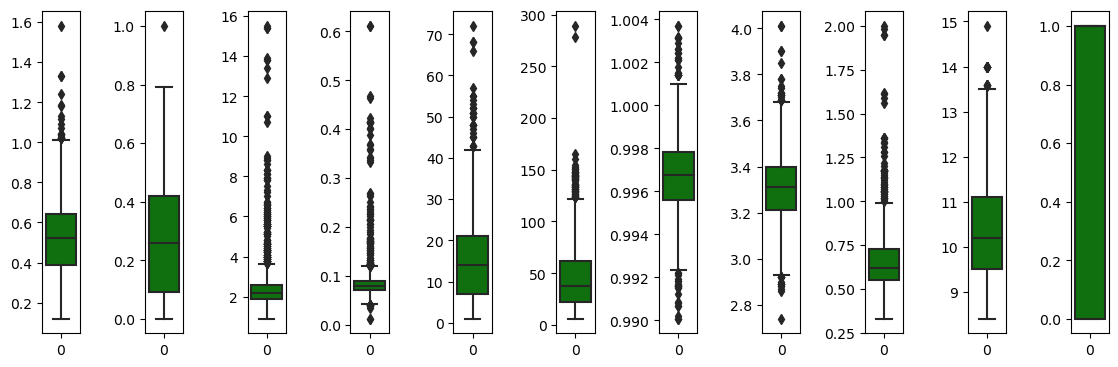

In [55]:
#Additional visualization for outliers
collist=vino2.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,3*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(vino2[collist[i]],color='green', orient='v')
    plt.tight_layout()

In [27]:
#Data points that are way too far from zero will be treated as the outliers.
# In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3
# respectively, that data point will be identified as outliers

In [28]:
#Removing Outliers
#In this project it will be use the Z-score value to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(vino2))
z
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [29]:
vino3=vino2[(z<3).all(axis=1)]
print(vino3.shape)
print(vino2.shape)

(1458, 12)
(1599, 12)


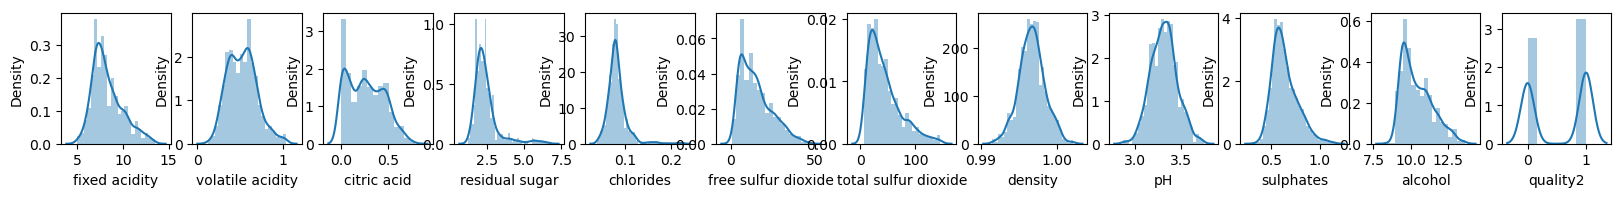

In [30]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(vino3[collist[i]])

In [31]:
vino3.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality2               -0.159793
dtype: float64

In [32]:
#Skewness = 0: Then normally distributed.
#Skewness > 0: Then more weight in the left tail of the distribution.
#Skewness < 0: Then more weight in the right tail of the distribution.

<Axes: >

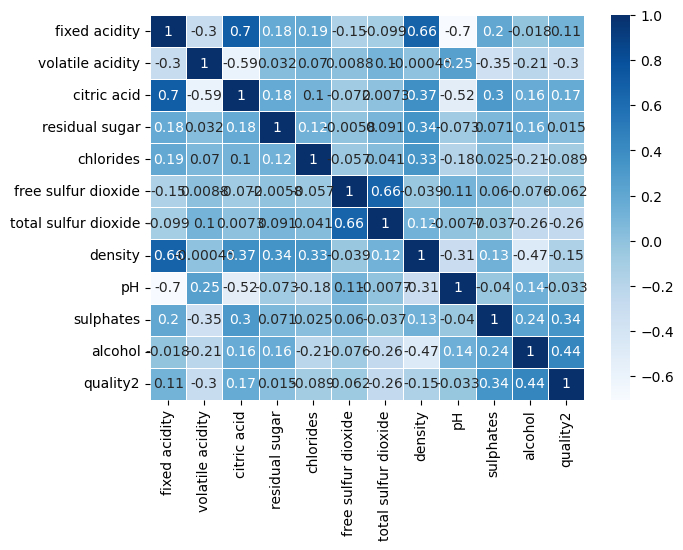

In [41]:
plt.figure(figsize=(7,5))  #to set the plot size
sns.heatmap(vino3.corr(),annot=True,linewidth=0.4,cmap='Blues') 

In [34]:
vino3.corr()['quality2']

fixed acidity           0.113812
volatile acidity       -0.297348
citric acid             0.169947
residual sugar          0.015080
chlorides              -0.089127
free sulfur dioxide    -0.061564
total sulfur dioxide   -0.259071
density                -0.149353
pH                     -0.032907
sulphates               0.335358
alcohol                 0.441333
quality2                1.000000
Name: quality2, dtype: float64

In [35]:
#From the above information  there is clear that alcohol is the most important characteristic to determine the quality of wine.

In [36]:
#sns.pairplot(vino2 ,hue ='quality2', vars =['fixed acidity','volatile acidity', 'citric acid', 'residual sugar',
 #      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
  #     'sulphates', 'alcohol'])

In [37]:
#Light shades are more correlated
#quality is the most correlated with alcohol
 

In [38]:
vino7 = vino3

In [39]:
vino7.to_csv('vino7.csv', index=False)